#### Import necessary Libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier,  VotingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense, Input, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, ClassifierMixin
from scikeras.wrappers import KerasClassifier
from keras.callbacks import EarlyStopping
from sklearn.base import BaseEstimator, ClassifierMixin
import shap
from sklearn.inspection import PartialDependenceDisplay

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
school_data = pd.read_csv("updated_dataset.csv")

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
school_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Total Curricular Units 1st Semester,Total Curricular Units 2nd Semester,Total Credits Earned,Total Units Enrolled,Weighted Grade 1st Semester,Weighted Grade 2nd Semester,GPA
0,0,7,0.441833,1,1,0,0.351853,0,12,9,5,9,0.431185,1,0,0,1,1,0,0.055060,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0,5,0.105361,10,1,0,0.847053,0,0,2,3,3,0.634096,1,0,0,0,1,0,0.037041,0,0.0,0.207639,0.133333,0.230769,0.554311,0.0,0.0,0.26087,0.181818,0.30,0.551906,0.0,0.732558,0.111111,0.640687,2,0.207639,0.231802,0.0,0.399875,0.0,0.0,0.0
2,0,0,0.441833,4,1,0,0.351853,0,21,26,9,9,0.397812,1,0,0,0,1,0,0.037041,0,0.0,0.207639,0.000000,0.000000,0.000000,0.0,0.0,0.26087,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,0,0.207639,0.231802,0.0,0.399875,0.0,0.0,0.0
3,0,7,0.200671,14,1,0,0.351853,0,22,26,5,3,0.328395,1,0,0,1,0,0,0.055060,0,0.0,0.207639,0.177778,0.230769,0.535905,0.0,0.0,0.26087,0.303030,0.25,0.510826,0.0,0.209302,0.000000,0.124174,2,0.207639,0.231802,0.0,0.399875,0.0,0.0,0.0
4,1,11,0.105361,2,0,0,0.065158,0,21,27,9,9,0.620746,0,0,0,1,0,0,0.424157,0,0.0,0.207639,0.200000,0.192308,0.501256,0.0,0.0,0.26087,0.181818,0.30,0.529996,0.0,0.732558,0.111111,0.640687,2,0.207639,0.231802,0.0,0.399875,0.0,0.0,0.0


In [5]:
X = school_data[['Previous qualification (grade)','Debtor','Tuition fees up to date',"Educational special needs", 'Scholarship holder', 'International',
       'Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)','Curricular units 1st sem (without evaluations)','Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)','Curricular units 2nd sem (grade)',
        'Age at enrollment']]

y = school_data["Target"]

In [6]:
# Split the data into training, validation, and test sets (60% train, 20% validation, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#### Manual Hyperparameter Tuning for Machine Learning Models

##### Key Hyperparameters for Logistic Regression
- C: Inverse of regularization strength. Smaller values specify stronger regularization.
- solver: The algorithm to use for optimization ('lbfgs', 'liblinear', etc.).

In [7]:
# Logistic Regression
log_reg = LogisticRegression(C=1.0, solver='lbfgs', max_iter=100)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

# Manually change hyperparameters
log_reg = LogisticRegression(C=0.1, solver='liblinear', max_iter=200)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression (C=0.1, solver='liblinear') Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.7605
Logistic Regression (C=0.1, solver='liblinear') Accuracy: 0.7175


##### Key Hyperparameters for Decision Trees
- max_depth: Maximum depth of the tree.
- min_samples_split: Minimum number of samples required to split a node.

In [8]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=3, min_samples_split=2)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

# Manually change hyperparameters
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=4)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree (max_depth=5, min_samples_split=4) Accuracy: {accuracy:.4f}")

Decision Tree Accuracy: 0.7311
Decision Tree (max_depth=5, min_samples_split=4) Accuracy: 0.7446


##### Key Hyperparameters for Random Forests
- n_estimators: Number of trees in the forest.
- max_features: Number of features to consider when looking for the best split.

In [9]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_features='sqrt')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Manually change hyperparameters
rf = RandomForestClassifier(n_estimators=200, max_features='log2')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest (n_estimators=200, max_features='log2') Accuracy: {accuracy:.4f}")


Random Forest Accuracy: 0.7661
Random Forest (n_estimators=200, max_features='log2') Accuracy: 0.7695


##### Key Hyperparameters for SVM
- C: Regularization parameter.
- kernel: Specifies the kernel type to be used in the algorithm (e.g., 'linear', 'rbf').

In [10]:
# SVM
svm = SVC(C=1.0, kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.4f}")

# Manually change hyperparameters
svm = SVC(C=0.5, kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM (C=0.5, kernel='linear') Accuracy: {accuracy:.4f}")


SVM Accuracy: 0.7492
SVM (C=0.5, kernel='linear') Accuracy: 0.7345


##### Key Hyperparameters for XGBoost
- learning_rate: Step size shrinkage.
- n_estimators: Number of boosting rounds.

In [11]:
# XGBoost
xg = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.4f}")

# Manually change hyperparameters
xg = xgb.XGBClassifier(learning_rate=0.05, n_estimators=200)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost (learning_rate=0.05, n_estimators=200) Accuracy: {accuracy:.4f}")


XGBoost Accuracy: 0.7672
XGBoost (learning_rate=0.05, n_estimators=200) Accuracy: 0.7729


#### Manual Hyperparameter Tuning for Deep Learning Models

##### Key Hyperparameters for Single Layer
- Number of Neurons (num_neurons): Changed from 32 to 64, allowing the model to capture more complexity.
- Learning Rate (learning_rate): Reduced to 0.001 to slow down the weight updates for more stable convergence.
- Batch Size (batch_size): Changed to 16, meaning the model will update weights more frequently with smaller batches of data.
- Epochs (epochs): Increased from 50 to 100, training the model for more iterations over the data.
- Activation Function (activation_function): Changed from 'relu' to 'tanh' for the hidden layer, allowing a different non-linearity in learning patterns.

In [12]:
# Define hyperparameters
num_neurons = 64              # Number of neurons in the hidden layer (original was 32)
learning_rate = 0.001         # Learning rate of the optimizer (original was default of Adam)
batch_size = 16               # Batch size (original was 32)
epochs = 100                  # Number of epochs (original was 50)
activation_function = 'tanh'  # Activation function for hidden layers (original was 'relu')

# Define the model architecture with adjusted hyperparameters
sl_model = Sequential()
sl_model.add(Input(shape=(X_train.shape[1],)))
sl_model.add(Dense(num_neurons, activation=activation_function))  # Modified neurons and activation function
sl_model.add(Dense(1, activation='sigmoid'))

# Compile the model with adjusted learning rate
optimizer = Adam(learning_rate=learning_rate)
sl_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with adjusted batch size and epochs
history = sl_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

# Evaluate the model performance
loss, accuracy = sl_model.evaluate(X_val, y_val)
print(f"Model Validation Accuracy: {accuracy:.4f}")


Epoch 1/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.1987 - loss: -0.4253 - val_accuracy: 0.1876 - val_loss: -2.5326
Epoch 2/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1677 - loss: -4.2563 - val_accuracy: 0.1932 - val_loss: -5.7640
Epoch 3/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1731 - loss: -7.4984 - val_accuracy: 0.2102 - val_loss: -9.2089
Epoch 4/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1977 - loss: -11.9276 - val_accuracy: 0.2237 - val_loss: -12.9637
Epoch 5/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2052 - loss: -16.1019 - val_accuracy: 0.2520 - val_loss: -16.9810
Epoch 6/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2383 - loss: -21.2641 - val_accuracy: 0.2701 - val_loss: -21.0938
Epoch 7/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2573 - loss: -24.8825 - val_accuracy: 0.2893 - val_loss: -25.0655
Epoch 8/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2693 - l

##### Key Hyperparameters for Multiple Layers
- Number of Neurons in the Hidden Layers (num_neurons_layer1, num_neurons_layer2):
Increased from 64 to 128 in the first hidden layer for better feature learning.
Increased from 32 to 64 in the second hidden layer to provide more capacity for learning.
Activation Functions (activation_layer1, activation_layer2):
- Changed the first hidden layer's activation function from relu to 'tanh' to experiment with different non-linearity.
Kept the relu activation for the second hidden layer as it often performs well in deep networks.
- Learning Rate (learning_rate):
Reduced from the default (0.001) to 0.0005 to make the training more gradual and stable.
- Batch Size (batch_size):
Increased the batch size from 32 to 64 to train on larger batches, which can help reduce noise and speed up training.
- Epochs (epochs):
Increased the number of epochs from 50 to 100 for more iterations, allowing the model to better converge on an optimal solution.

In [13]:
# Define new hyperparameters
num_neurons_layer1 = 128       # Changed number of neurons in the first layer
num_neurons_layer2 = 64        # Changed number of neurons in the second layer
activation_layer1 = 'tanh'     # Changed activation function for the first layer
activation_layer2 = 'relu'     # Retained activation function for the second layer
learning_rate = 0.0005         # Reduced learning rate for more stable training
batch_size = 64                # Increased batch size
epochs = 100                   # Increased the number of epochs

# Define the model architecture with modified hyperparameters
ml_model = Sequential()

ml_model.add(Input(shape=(X_train.shape[1],)))
ml_model.add(Dense(num_neurons_layer1, activation=activation_layer1))  # Modified neurons and activation
ml_model.add(Dense(num_neurons_layer2, activation=activation_layer2))  # Modified neurons in the second layer
ml_model.add(Dense(1, activation='sigmoid'))

# Compile the model with a modified learning rate
optimizer = Adam(learning_rate=learning_rate)
ml_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with adjusted batch size and epochs
history_ml = ml_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

# Evaluate model performance
loss, accuracy = ml_model.evaluate(X_val, y_val)
print(f"Model Validation Accuracy: {accuracy:.4f}")

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.2053 - loss: 0.1804 - val_accuracy: 0.1876 - val_loss: -0.7386
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1748 - loss: -1.3048 - val_accuracy: 0.1876 - val_loss: -2.5047
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1770 - loss: -4.1392 - val_accuracy: 0.1876 - val_loss: -6.3347
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1750 - loss: -9.5164 - val_accuracy: 0.1876 - val_loss: -13.4832
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1762 - loss: -19.2635 - val_accuracy: 0.1876 - val_loss: -24.0547
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1750 - loss: -30.9293 - val_accuracy: 0.1876 - val_loss: -38.0338
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1697 - loss: -53.6115 - val_accuracy: 0.1898 - val_loss: -54.4265
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1893 - loss: -72.8667 - v

##### Key Hyperparameters for Neural Network with Dropout
- Number of Neurons (num_neurons_layer1, num_neurons_layer2):
Increased from 64 to 128 in the first hidden layer to allow the model to capture more complexity.
Increased from 32 to 64 in the second hidden layer for improved learning capacity.
- Dropout Rate (dropout_rate):
Changed from 0.5 (dropping 50% of neurons) to 0.3 (dropping 30% of neurons), allowing more neurons to be active during each training iteration while still preventing overfitting.
- Activation Functions (activation_layer1, activation_layer2):
Changed the first hidden layer's activation function from 'relu' to 'tanh' to experiment with different non-linear activations.
Retained 'relu' for the second layer, which is a popular choice for deep networks.
- Learning Rate (learning_rate):
Reduced the learning rate from the default (0.001) to 0.0003, slowing down the training process for a more gradual convergence and possibly better performance.
- Batch Size (batch_size):
Increased from 32 to 64, so the model trains on larger batches, which can stabilize training.
- Epochs (epochs):
Increased from 50 to 80 to allow the model more iterations over the dataset for better training.

In [14]:
# Define new hyperparameters
num_neurons_layer1 = 128       # Increased number of neurons in the first layer
num_neurons_layer2 = 64        # Increased number of neurons in the second layer
dropout_rate = 0.3             # Reduced dropout rate to retain more neurons during training
activation_layer1 = 'tanh'     # Changed activation function for the first layer
activation_layer2 = 'relu'     # Kept activation function for the second layer
learning_rate = 0.0003         # Reduced learning rate for more stable training
batch_size = 64                # Increased batch size
epochs = 80                    # Increased the number of epochs

# Define the model architecture with modified hyperparameters
nd_model = Sequential()

nd_model.add(Input(shape=(X_train.shape[1],)))
nd_model.add(Dense(num_neurons_layer1, activation=activation_layer1))  # Modified neurons and activation
nd_model.add(Dropout(dropout_rate))  # Adjusted dropout rate
nd_model.add(Dense(num_neurons_layer2, activation=activation_layer2))  # Modified neurons in the second layer
nd_model.add(Dropout(dropout_rate))  # Adjusted dropout rate
nd_model.add(Dense(1, activation='sigmoid'))

# Compile the model with modified learning rate
optimizer = Adam(learning_rate=learning_rate)
nd_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with adjusted batch size and epochs
history_nd = nd_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

# Evaluate model performance
loss, accuracy = nd_model.evaluate(X_val, y_val)
print(f"Model Validation Accuracy: {accuracy:.4f}")

Epoch 1/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.2037 - loss: 0.4824 - val_accuracy: 0.1876 - val_loss: -0.2243
Epoch 2/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1819 - loss: -0.5737 - val_accuracy: 0.1876 - val_loss: -1.0888
Epoch 3/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1861 - loss: -1.6522 - val_accuracy: 0.1876 - val_loss: -2.3499
Epoch 4/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1867 - loss: -3.4503 - val_accuracy: 0.1876 - val_loss: -4.4344
Epoch 5/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1851 - loss: -6.0103 - val_accuracy: 0.1876 - val_loss: -7.6862
Epoch 6/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1853 - loss: -11.1198 - val_accuracy: 0.1876 - val_loss: -12.5246
Epoch 7/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1729 - loss: -16.5488 - val_accuracy: 0.1876 - val_loss: -18.7023
Epoch 8/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1703 - loss: -24.1750 - val_accuracy

##### Key Hyperparameters for Neural Network with Different Activation Functions
- Number of Neurons (num_neurons_layer1, num_neurons_layer2):
Increased the first layer from 64 to 128 neurons to capture more features.
Kept the second layer at 64 neurons for sufficient capacity without being too complex.
- Dropout Rate (dropout_rate):
Added a dropout layer with a dropout rate of 0.3 after the first hidden layer to help reduce overfitting while maintaining model performance.
- Learning Rate (learning_rate):
Set at 0.001, this is the standard rate, but you can experiment with this by reducing it to see if it helps stabilize training.
- Batch Size (batch_size):
Increased from 32 to 64 to provide more stable updates to the model weights.
- Epochs (epochs):
Increased from 50 to 80 to allow the model more training time to learn from the dataset.

In [15]:
# Define new hyperparameters
num_neurons_layer1 = 128       # Increased number of neurons in the first layer
num_neurons_layer2 = 64        # Increased number of neurons in the second layer
dropout_rate = 0.3             # Added dropout to help prevent overfitting
learning_rate = 0.001          # Set learning rate
batch_size = 64                # Increased batch size
epochs = 80                    # Increased the number of epochs

# Define the model architecture with modified hyperparameters
na_model = Sequential()

na_model.add(Input(shape=(X_train.shape[1],)))

# First hidden layer (128 neurons) with LeakyReLU activation
na_model.add(Dense(num_neurons_layer1))
na_model.add(LeakyReLU(negative_slope=0.1))

# Added dropout layer after the first hidden layer
na_model.add(Dropout(dropout_rate))

# Second hidden layer (64 neurons) with tanh activation
na_model.add(Dense(num_neurons_layer2, activation='tanh'))

# Output layer (binary classification)
na_model.add(Dense(1, activation='sigmoid'))

# Compile the model with modified learning rate
optimizer = Adam(learning_rate=learning_rate)
na_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with adjusted batch size and epochs
history_na = na_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

# Evaluate model performance
loss, accuracy = na_model.evaluate(X_val, y_val)
print(f"Model Validation Accuracy: {accuracy:.4f}")

Epoch 1/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.1820 - loss: -0.1242 - val_accuracy: 0.1876 - val_loss: -1.7330
Epoch 2/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1780 - loss: -2.5935 - val_accuracy: 0.2147 - val_loss: -3.3853
Epoch 3/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2149 - loss: -4.5874 - val_accuracy: 0.3062 - val_loss: -5.3398
Epoch 4/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2948 - loss: -6.4879 - val_accuracy: 0.3424 - val_loss: -6.8279
Epoch 5/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3202 - loss: -7.8205 - val_accuracy: 0.3243 - val_loss: -7.9917
Epoch 6/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3282 - loss: -9.4792 - val_accuracy: 0.3582 - val_loss: -9.4615
Epoch 7/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3531 - loss: -10.6322 - val_accuracy: 0.3571 - val_loss: -10.6514
Epoch 8/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3629 - loss: -11.4344 - val_accuracy:

##### Key Hyperparameters for Neural Network with Batch Normalization
- Number of Neurons (num_neurons_layer1, num_neurons_layer2): Increased the first layer from 64 to 128 neurons to capture more features. Kept the second layer at 64 neurons for sufficient capacity without being too complex.
- Dropout Rate (dropout_rate): Added a dropout layer with a dropout rate of 0.3 after the first hidden layer to help reduce overfitting while maintaining model performance.
- Learning Rate (learning_rate): Set at 0.001, this is the standard rate, but you can experiment with this by reducing it to see if it helps stabilize training.
- Batch Size (batch_size): Increased from 32 to 64 to provide more stable updates to the model weights.
- Epochs (epochs): Increased from 50 to 80 to allow the model more training time to learn from the dataset.

In [16]:
# Hyperparameter settings
num_neurons_layer1 = 128       # Increased neurons in the first layer
num_neurons_layer2 = 64        # Increased neurons in the second layer
dropout_rate = 0.3             # Dropout rate to prevent overfitting
learning_rate = 0.001          # Learning rate for the optimizer
batch_size = 64                # Batch size for training
epochs = 80                    # Number of epochs for training

# Neural Network with Batch Normalization
nb_model = Sequential()

# Input layer
nb_model.add(Input(shape=(X_train.shape[1],)))

# First hidden layer (128 neurons) with batch normalization
nb_model.add(Dense(num_neurons_layer1))
nb_model.add(BatchNormalization())  # Batch normalization layer
nb_model.add(LeakyReLU(negative_slope=0.1))  # Leaky ReLU after normalization

# Dropout layer after the first hidden layer
nb_model.add(Dropout(dropout_rate))

# Second hidden layer (64 neurons) with batch normalization
nb_model.add(Dense(num_neurons_layer2))
nb_model.add(BatchNormalization())
nb_model.add(LeakyReLU(negative_slope=0.1))

# Output layer (binary classification)
nb_model.add(Dense(1, activation='sigmoid'))

# Compile the model with adjusted learning rate
optimizer = Adam(learning_rate=learning_rate)
nb_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with adjusted batch size and epochs
history_nb = nb_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

# Evaluate model performance on validation set
loss, accuracy = nb_model.evaluate(X_val, y_val)
print(f"Model Validation Accuracy: {accuracy:.4f}")

Epoch 1/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.3163 - loss: 0.0291 - val_accuracy: 0.2113 - val_loss: -0.2289
Epoch 2/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3599 - loss: -1.7517 - val_accuracy: 0.2384 - val_loss: -0.9215
Epoch 3/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3400 - loss: -2.8095 - val_accuracy: 0.2655 - val_loss: -1.8374
Epoch 4/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3619 - loss: -4.1441 - val_accuracy: 0.3141 - val_loss: -2.8341
Epoch 5/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3569 - loss: -5.7871 - val_accuracy: 0.3514 - val_loss: -4.0301
Epoch 6/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3693 - loss: -7.9547 - val_accuracy: 0.3729 - val_loss: -5.2171
Epoch 7/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3614 - loss: -10.3140 - val_accuracy: 0.3831 - val_loss: -7.1481
Epoch 8/80
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3575 - loss: -12.6367 - val_accuracy: 0

#### Automated Hyperparameter Tuning For Machine Learning

##### Logistic Regression with Grid Search

In [17]:
# Define the model
logistic_model = LogisticRegression(max_iter=200)

# Set up grid search parameters
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

# Grid search
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters (Grid Search):", grid_search.best_params_)
print(f"Best accuracy (Grid Search): {grid_search.best_score_:.4f}")


Best parameters (Grid Search): {'C': 100, 'solver': 'liblinear'}
Best accuracy (Grid Search): 0.7638


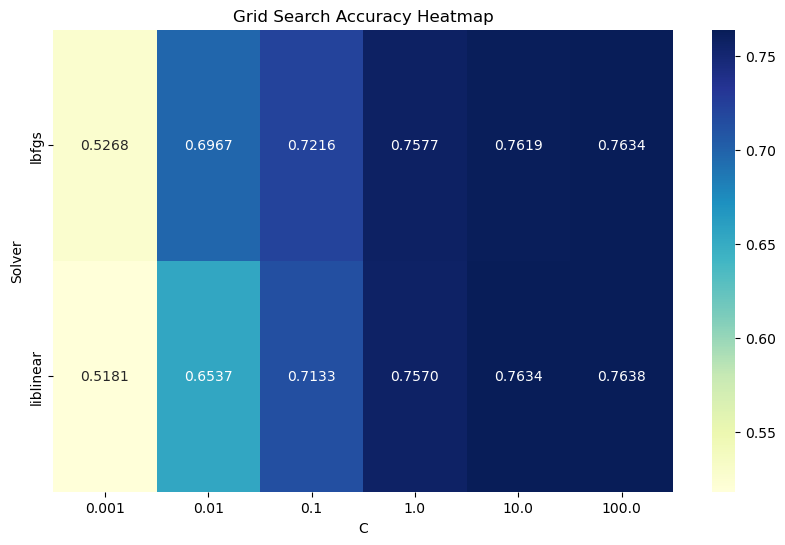

In [18]:
# Convert grid search results into a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Pivot the results to get the mean test score for each combination of 'C' and 'solver'
pivot_table = results_df.pivot(index='param_solver', columns='param_C', values='mean_test_score')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap="YlGnBu", cbar=True)
plt.title('Grid Search Accuracy Heatmap')
plt.xlabel('C')
plt.ylabel('Solver')

# Save the heatmap as an image
plt.savefig('grid_search_heatmap.png')

# Show the heatmap
plt.show()


##### Random Search for Logistic Regression

In [19]:
# Random search
random_search_logistic = RandomizedSearchCV(estimator=logistic_model, param_distributions=param_grid, n_jobs=-1, n_iter=10, cv=3)
random_search_logistic.fit(X_train, y_train)

# Best parameters and accuracy
print("Best parameters (Logistic Regression Random Search):", random_search_logistic.best_params_)
print(f"Best accuracy (Logistic Regression Random Search): {random_search_logistic.best_score_:.4f}")


Best parameters (Logistic Regression Random Search): {'solver': 'lbfgs', 'C': 100}
Best accuracy (Logistic Regression Random Search): 0.7664


In [20]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the objective function for hyperparameter tuning
def objective(params):
    # Initialize the Logistic Regression model with parameters
    model = LogisticRegression(
        C=params['C'],              # Inverse of regularization strength
        max_iter=int(params['max_iter']),  # Maximum number of iterations
        solver=params['solver'],    # Solver type
        random_state=42
    )
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict and calculate accuracy
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    # Return the loss (negative accuracy) and status
    return {'loss': -accuracy, 'status': STATUS_OK}

# Define the hyperparameter search space
space = {
    'C': hp.uniform('C', 0.01, 10),                # Regularization strength
    'max_iter': hp.choice('max_iter', [200, 500, 1000]),  # Increased number of iterations
    'solver': hp.choice('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg'])  # Added more solvers
}

# Initialize trials object to track progress
trials = Trials()

# Run Bayesian Optimization
best_params = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# Extract best accuracy from trials
best_accuracy = -trials.best_trial['result']['loss']

# Print the best parameters and best accuracy
print("Best parameters (Logistic Regression Hyperopt):", best_params)
print(f"Best score (accuracy): {best_accuracy:.4}")




100%|███████████████████████████████████████████████| 50/50 [00:06<00:00,  7.77trial/s, best loss: -0.7661016949152543]
Best parameters (Logistic Regression Hyperopt): {'C': 0.7544906301316394, 'max_iter': 0, 'solver': 1}
Best score (accuracy): 0.7661


##### Grid Search for Decision Trees

In [21]:
# Define the model
dt_model = DecisionTreeClassifier()

# Set up the parameter grid
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, n_jobs=-1, cv=3)
grid_search_dt.fit(X_train, y_train)

# Best parameters and accuracy
print("Best parameters (Decision Tree):", grid_search_dt.best_params_)
print(f"Best accuracy (Decision Tree): {grid_search_dt.best_score_:.4f}")


Best parameters (Decision Tree): {'max_depth': 10, 'min_samples_split': 2}
Best accuracy (Decision Tree): 0.7257


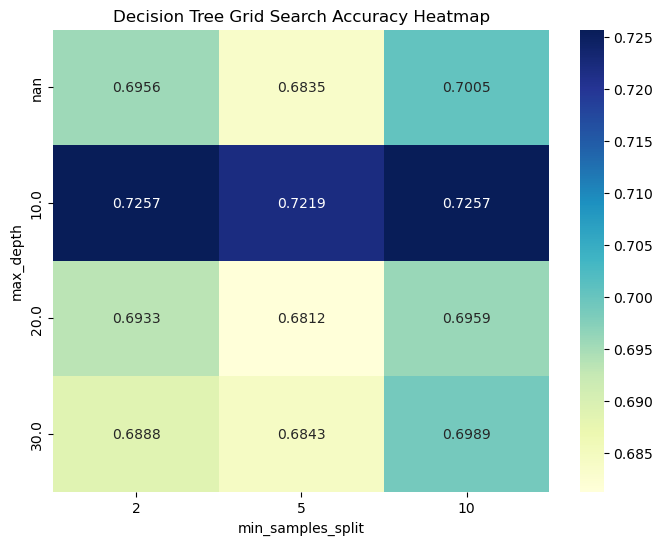

In [22]:
# Convert the Decision Tree grid search results into a DataFrame
results_dt_df = pd.DataFrame(grid_search_dt.cv_results_)

# Pivot the results to get the mean test score for each combination of 'max_depth' and 'min_samples_split'
pivot_table_dt = results_dt_df.pivot(index='param_max_depth', columns='param_min_samples_split', values='mean_test_score')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table_dt, annot=True, fmt=".4f", cmap="YlGnBu", cbar=True)
plt.title('Decision Tree Grid Search Accuracy Heatmap')
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')

# Save the heatmap as an image
plt.savefig('decision_tree_grid_search_heatmap.png')

# Show the heatmap
plt.show()


##### Random Search for Decision Trees

In [23]:
# Random search
random_search_dt = RandomizedSearchCV(estimator=dt_model, param_distributions=param_grid_dt, n_jobs=-1, n_iter=10, cv=3)
random_search_dt.fit(X_train, y_train)

# Best parameters and accuracy
print("Best parameters (Decision Tree Random Search):", random_search_dt.best_params_)
print(f"Best accuracy (Decision Tree Random Search): {random_search_dt.best_score_:.4f}")

Best parameters (Decision Tree Random Search): {'min_samples_split': 5, 'max_depth': 10}
Best accuracy (Decision Tree Random Search): 0.7257


##### Bayesian Optimization with Hyperopt for Decision Trees

In [24]:
from hyperopt import hp, fmin, tpe
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the objective function
def objective_dt(params):
    model = DecisionTreeClassifier(max_depth=params['max_depth'], min_samples_split=params['min_samples_split'])
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return {'loss': -accuracy, 'status': 'ok', 'accuracy': accuracy}  # Return accuracy as well

# Define the search space
space_dt = {
    'max_depth': hp.choice('max_depth', [None, 10, 20, 30]),
    'min_samples_split': hp.choice('min_samples_split', [2, 5, 10])
}

# Run Hyperopt
best_params_dt = fmin(fn=objective_dt, space=space_dt, algo=tpe.suggest, max_evals=50)

# Convert Hyperopt indices back to actual values
best_params_dt['max_depth'] = [None, 10, 20, 30][best_params_dt['max_depth']]
best_params_dt['min_samples_split'] = [2, 5, 10][best_params_dt['min_samples_split']]

# Retrieve the best score
best_score_dt = -objective_dt(best_params_dt)['loss']

print("Best parameters (Decision Tree Hyperopt):", best_params_dt)
print(f"Best score (accuracy): {best_score_dt:.4f}")

100%|███████████████████████████████████████████████| 50/50 [00:01<00:00, 29.21trial/s, best loss: -0.7378531073446327]
Best parameters (Decision Tree Hyperopt): {'max_depth': 10, 'min_samples_split': 2}
Best score (accuracy): 0.7299


##### Grid Search for Random Forests

In [25]:
# Define the model
rf_model = RandomForestClassifier()

# Set up the parameter grid
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
}

# Grid search
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, n_jobs=-1, cv=3)
grid_search_rf.fit(X_train, y_train)

# Best parameters and accuracy
print("Best parameters (Random Forest):", grid_search_rf.best_params_)
print(f"Best accuracy (Random Forest): {grid_search_rf.best_score_:.4f}")


Best parameters (Random Forest): {'max_depth': 20, 'n_estimators': 100}
Best accuracy (Random Forest): 0.7747


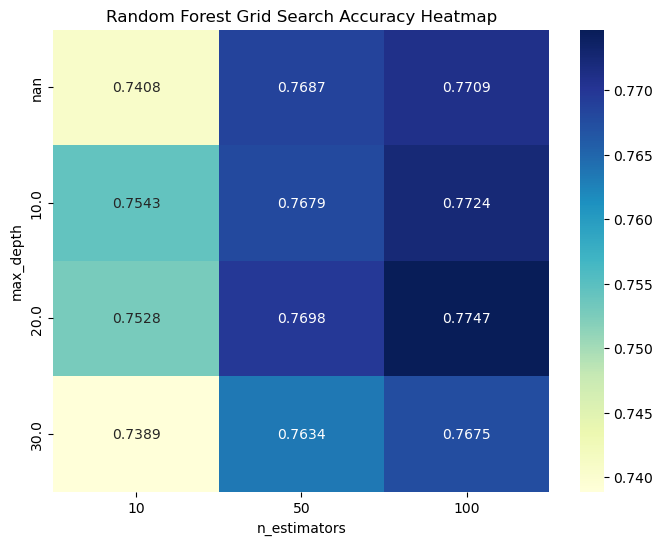

In [26]:
# Convert the Random Forest grid search results into a DataFrame
results_rf_df = pd.DataFrame(grid_search_rf.cv_results_)

# Pivot the results to get the mean test score for each combination of 'max_depth' and 'n_estimators'
pivot_table_rf = results_rf_df.pivot(index='param_max_depth', columns='param_n_estimators', values='mean_test_score')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table_rf, annot=True, fmt=".4f", cmap="YlGnBu", cbar=True)
plt.title('Random Forest Grid Search Accuracy Heatmap')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')

# Save the heatmap as an image
plt.savefig('random_forest_grid_search_heatmap.png')

# Show the heatmap
plt.show()


##### Random Search for Random Forests

In [27]:
# Random search
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid_rf, n_jobs=-1, n_iter=10, cv=3)
random_search_rf.fit(X_train, y_train)

# Best parameters and accuracy
print("Best parameters (Random Forest Random Search):", random_search_rf.best_params_)
print(f"Best accuracy (Random Forest Random Search): {random_search_rf.best_score_:.4f}")


Best parameters (Random Forest Random Search): {'n_estimators': 100, 'max_depth': None}
Best accuracy (Random Forest Random Search): 0.7747


##### Bayesian Optimization with Hyperopt for Random Forests

In [28]:
# Define the objective function
def objective_rf(params):
    model = RandomForestClassifier(n_estimators=params['n_estimators'], max_depth=params['max_depth'])
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return {'loss': -accuracy, 'status': 'ok', 'accuracy': accuracy}  # Return accuracy as well

# Define the search space
space_rf = {
    'n_estimators': hp.choice('n_estimators', [10, 50, 100]),
    'max_depth': hp.choice('max_depth', [None, 10, 20, 30])
}

# Run Hyperopt
best_params_rf = fmin(fn=objective_rf, space=space_rf, algo=tpe.suggest, max_evals=50)

# Convert Hyperopt indices back to actual values
best_params_rf['n_estimators'] = [10, 50, 100][best_params_rf['n_estimators']]
best_params_rf['max_depth'] = [None, 10, 20, 30][best_params_rf['max_depth']]

# Retrieve the best score
best_score_rf = -objective_rf(best_params_rf)['loss']

print("Best parameters (Random Forest Hyperopt):", best_params_rf)
print(f"Best score (accuracy): {best_score_rf:.4f}")

100%|███████████████████████████████████████████████| 50/50 [00:28<00:00,  1.73trial/s, best loss: -0.7796610169491526]
Best parameters (Random Forest Hyperopt): {'max_depth': 20, 'n_estimators': 100}
Best score (accuracy): 0.7638


##### Grid Search for SVM

In [29]:
# Define the model
svm_model = SVC()

# Set up the parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Grid search
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, n_jobs=-1, cv=3)
grid_search_svm.fit(X_train, y_train)

# Best parameters and accuracy
print("Best parameters (SVM):", grid_search_svm.best_params_)
print(f"Best accuracy (SVM): {grid_search_svm.best_score_:.4f}")


Best parameters (SVM): {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best accuracy (SVM): 0.7653


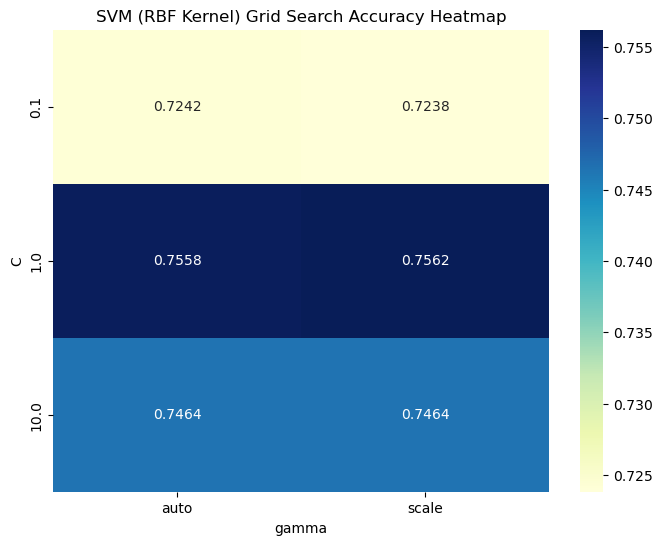

In [30]:
# Convert the SVM grid search results into a DataFrame
results_svm_df = pd.DataFrame(grid_search_svm.cv_results_)

# Filter results for a specific kernel, e.g., 'rbf'
results_svm_rbf = results_svm_df[results_svm_df['param_kernel'] == 'rbf']

# Pivot the results to get the mean test score for each combination of 'C' and 'gamma'
pivot_table_svm_rbf = results_svm_rbf.pivot(index='param_C', columns='param_gamma', values='mean_test_score')

# Set up the plot for the SVM 'rbf' kernel heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table_svm_rbf, annot=True, fmt=".4f", cmap="YlGnBu", cbar=True)
plt.title('SVM (RBF Kernel) Grid Search Accuracy Heatmap')
plt.xlabel('gamma')
plt.ylabel('C')

# Save the heatmap as an image
plt.savefig('svm_rbf_grid_search_heatmap.png')

# Show the heatmap
plt.show()

##### Random Search for SVM

In [31]:
# Random search
random_search_svm = RandomizedSearchCV(estimator=svm_model, param_distributions=param_grid_svm, n_jobs=-1, n_iter=10, cv=3)
random_search_svm.fit(X_train, y_train)

# Best parameters and accuracy
print("Best parameters (SVM Random Search):", random_search_svm.best_params_)
print(f"Best accuracy (SVM Random Search): {random_search_svm.best_score_:.4f}")


Best parameters (SVM Random Search): {'kernel': 'linear', 'gamma': 'auto', 'C': 1}
Best accuracy (SVM Random Search): 0.7653


##### Bayesian Optimization with Hyperopt for SVM

In [32]:
from hyperopt import hp, fmin, tpe
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Define the objective function
def objective_svm(params):
    model = SVC(C=params['C'], kernel=params['kernel'], gamma=params['gamma'])
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return {'loss': -accuracy, 'status': 'ok', 'accuracy': accuracy}  # Return accuracy as well

# Define the search space
space_svm = {
    'C': hp.loguniform('C', np.log(0.1), np.log(10)),  # Log-uniform distribution for C
    'kernel': hp.choice('kernel', ['linear', 'rbf', 'poly']),
    'gamma': hp.choice('gamma', ['scale', 'auto'])
}

# Run Hyperopt
best_params_svm = fmin(fn=objective_svm, space=space_svm, algo=tpe.suggest, max_evals=50)

# Convert kernel and gamma choices back to actual values
best_params_svm['kernel'] = ['linear', 'rbf', 'poly'][best_params_svm['kernel']]
best_params_svm['gamma'] = ['scale', 'auto'][best_params_svm['gamma']]

# Retrieve the best score
best_score_svm = -objective_svm(best_params_svm)['loss']

print("Best parameters (SVM Hyperopt):", best_params_svm)
print(f"Best score (accuracy): {best_score_svm:.4f}")


100%|███████████████████████████████████████████████| 50/50 [00:35<00:00,  1.39trial/s, best loss: -0.7615819209039548]
Best parameters (SVM Hyperopt): {'C': 3.1149559581586637, 'gamma': 'scale', 'kernel': 'rbf'}
Best score (accuracy): 0.7616


#####  Grid Search for XGBoost

In [33]:
# Define the model without use_label_encoder
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')

# Set up the parameter grid
param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Grid search
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, n_jobs=-1, cv=3)
grid_search_xgb.fit(X_train, y_train)

# Best parameters and accuracy
print("Best parameters (XGBoost):", grid_search_xgb.best_params_)
print(f"Best accuracy (XGBoost): {grid_search_xgb.best_score_:.4f}")

Best parameters (XGBoost): {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best accuracy (XGBoost): 0.7709


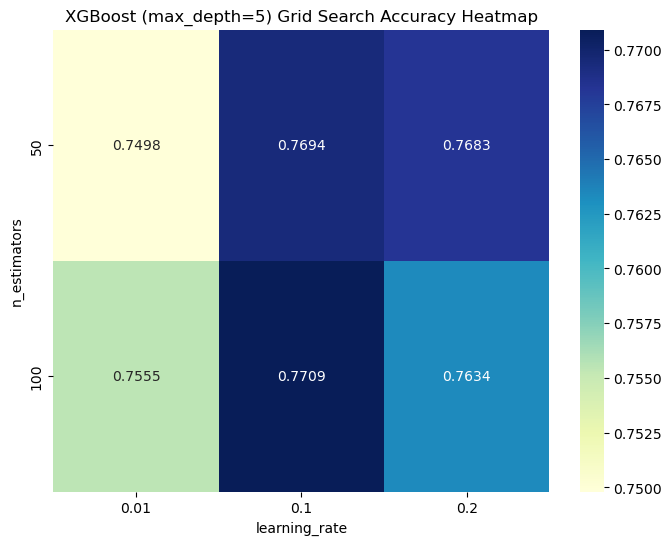

In [34]:
# Convert the XGBoost grid search results into a DataFrame
results_xgb_df = pd.DataFrame(grid_search_xgb.cv_results_)

# Filter results for a specific max_depth, e.g., max_depth = 5
results_xgb_depth5 = results_xgb_df[results_xgb_df['param_max_depth'] == 5]

# Pivot the results to get the mean test score for each combination of 'n_estimators' and 'learning_rate'
pivot_table_xgb = results_xgb_depth5.pivot(index='param_n_estimators', columns='param_learning_rate', values='mean_test_score')

# Set up the plot for the XGBoost heatmap with max_depth=5
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table_xgb, annot=True, fmt=".4f", cmap="YlGnBu", cbar=True)
plt.title('XGBoost (max_depth=5) Grid Search Accuracy Heatmap')
plt.xlabel('learning_rate')
plt.ylabel('n_estimators')

# Save the heatmap as an image
plt.savefig('xgboost_grid_search_heatmap.png')

# Show the heatmap
plt.show()


##### Random Search for XGBoost

In [35]:
#Random search
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid_xgb, n_jobs=-1, n_iter=10, cv=3)
random_search_xgb.fit(X_train, y_train)

# Best parameters and accuracy
print("Best parameters (XGBoost Random Search):", random_search_xgb.best_params_)
print(f"Best accuracy (XGBoost Random Search): {random_search_xgb.best_score_:.4f}")

Best parameters (XGBoost Random Search): {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Best accuracy (XGBoost Random Search): 0.7709


##### Bayesian Optimization with Hyperopt for XGBoost

In [36]:
# Initialize a variable to keep track of the best accuracy
best_accuracy = 0

# Define the objective function
def objective_xgb(params):
    model = xgb.XGBClassifier(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        learning_rate=params['learning_rate'],
        eval_metric='mlogloss'  # Keep eval_metric
    )
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    # Store the best accuracy
    global best_accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy  # Update the best accuracy

    # Return a dictionary containing the loss and the parameters
    return {'loss': -accuracy, 'status': STATUS_OK}

# Define the search space
space_xgb = {
    'n_estimators': hp.choice('n_estimators', [50, 100]),
    'max_depth': hp.choice('max_depth', [3, 5, 7]),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

# Run Hyperopt
best_params_xgb = fmin(fn=objective_xgb, space=space_xgb, algo=tpe.suggest, max_evals=50)

# Print the best parameters and best score
print("Best parameters (XGBoost Hyperopt):", best_params_xgb)
print(f"Best score (accuracy): {best_accuracy:.4f}")


100%|███████████████████████████████████████████████| 50/50 [00:25<00:00,  1.99trial/s, best loss: -0.7853107344632768]
Best parameters (XGBoost Hyperopt): {'learning_rate': 0.10498530318042879, 'max_depth': 2, 'n_estimators': 1}
Best score (accuracy): 0.7853


#### Advanced Ensemble Methods For Machine Learning

##### - Stacking ensemble

In [37]:
# Initialize base models
log_reg = LogisticRegression(max_iter=200)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC(probability=True)  # Enable probability estimates for SVM
xgboost_model = xgb.XGBClassifier(eval_metric='mlogloss')  # Use only required parameters

# Create a stacking classifier
base_models = [
    ('logistic', log_reg),
    ('decision_tree', decision_tree),
    ('random_forest', random_forest),
    ('svm', svm),
    ('xgboost', xgboost_model)
]

# Use logistic regression as the final estimator
stacked_model = StackingClassifier(estimators=base_models, final_estimator=log_reg)

# Fit the stacked model
stacked_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_stacked = stacked_model.predict(X_test)
print(f'Stacked Model Accuracy: {accuracy_score(y_test, y_pred_stacked):.4f}')


Stacked Model Accuracy: 0.7808


##### - Blending techniques

In [38]:
# Define the XGBoost model without use_label_encoder
xgboost = xgb.XGBClassifier(eval_metric='mlogloss')  # Keep only eval_metric

# Train base models
models = [log_reg, decision_tree, random_forest, svm, xgboost]
for model in models:
    model.fit(X_train, y_train)

# Get predictions
predictions = np.column_stack([model.predict(X_test) for model in models])
blended_pred = np.mean(predictions, axis=1).round().astype(int)

print(f'Blended Model Accuracy: {accuracy_score(y_test, blended_pred):.4f}')


Blended Model Accuracy: 0.7627


##### - Voting classifier with optimized base models

In [39]:
# Create a voting classifier
voting_model = VotingClassifier(estimators=base_models, voting='soft')
voting_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_voting = voting_model.predict(X_test)
print(f'Voting Classifier Accuracy: {accuracy_score(y_test, y_pred_voting):.4f}')

Voting Classifier Accuracy: 0.7740


#### Advanced Ensemble Methods For Deep Learning

##### - Stacking ensemble

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Input

input_dim = X.shape[1]  

def sl_model():
    model = Sequential()
    model.add(Input(shape=(input_dim,))) 
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def ml_model():
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def nd_model():
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def na_model():
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(64, activation='tanh'))  # Different activation
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def nb_model():
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Update the models dictionary to call the model functions
models = {
    "single_layer": sl_model(), 
    "multiple_layers": ml_model(),
    "dropout": nd_model(),
    "diff_activation": na_model(),
    "batch_norm": nb_model()
}


In [41]:
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        self.keras_model.fit(X, y, epochs=10, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        return (self.keras_model.predict(X) > 0.5).astype("int32")

In [42]:
# Wrapping Keras models for scikit-learn
stacking_estimators = [(name, KerasClassifierWrapper(model)) for name, model in models.items()]

# Logistic Regression as the meta-learner
stacking_clf = StackingClassifier(estimators=stacking_estimators, final_estimator=LogisticRegression(), cv=5)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Evaluate the stacking ensemble
y_pred = stacking_clf.predict(X_test)
print(f'Stacking Ensemble Accuracy: {accuracy_score(y_test, y_pred):.4f}')

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
28/28 ━━━━━━━━━━━━

##### - Blending techniques

In [43]:
def get_blended_predictions(models, X):
    predictions = np.zeros(X.shape[0])
    for model in models.values():
        predictions += model.predict(X).flatten()  # Summing predictions
    return (predictions / len(models)) > 0.5  # Averaging predictions

blended_preds = get_blended_predictions(models, X_test)
print(f'Blended Model Accuracy: {accuracy_score(y_test, blended_preds):.4f}')

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Blended Model Accuracy: 0.3107


#### Feature Importance and Model Interpretability

##### - feature importance plots for tree-based models

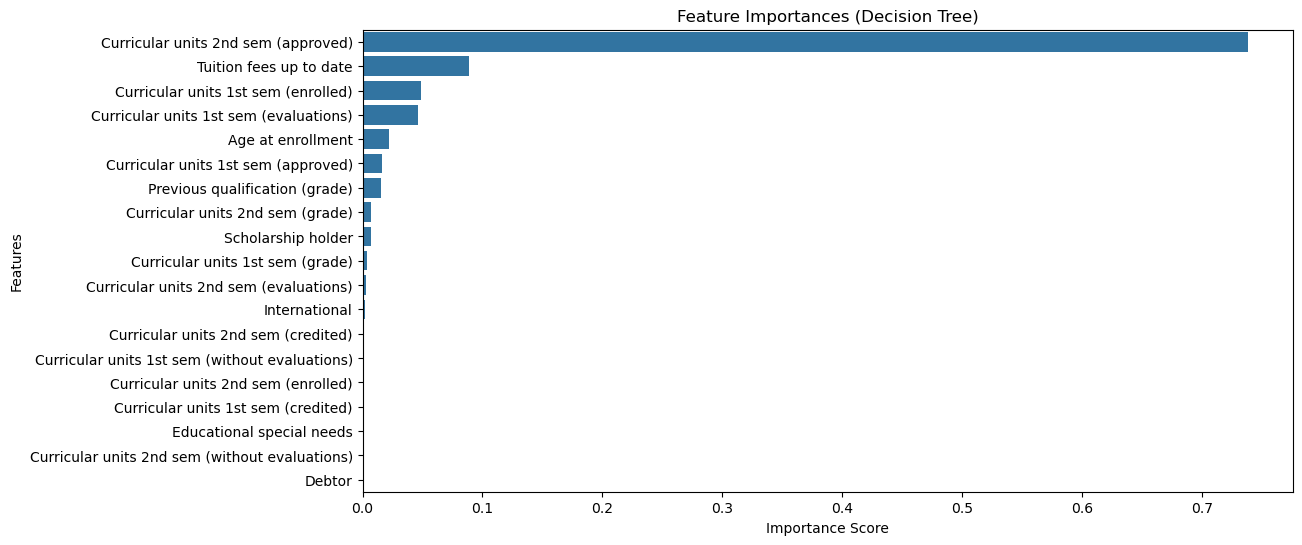

In [44]:
# Get feature importances from Decision Tree
importances_tree = dt.feature_importances_

# Sort the feature importances in descending order and get the indices
indices = np.argsort(importances_tree)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances (Decision Tree)")
sns.barplot(x=importances_tree[indices], y=X.columns[indices])
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.savefig('decision_tree_feature_importances.png', bbox_inches='tight')
plt.show()

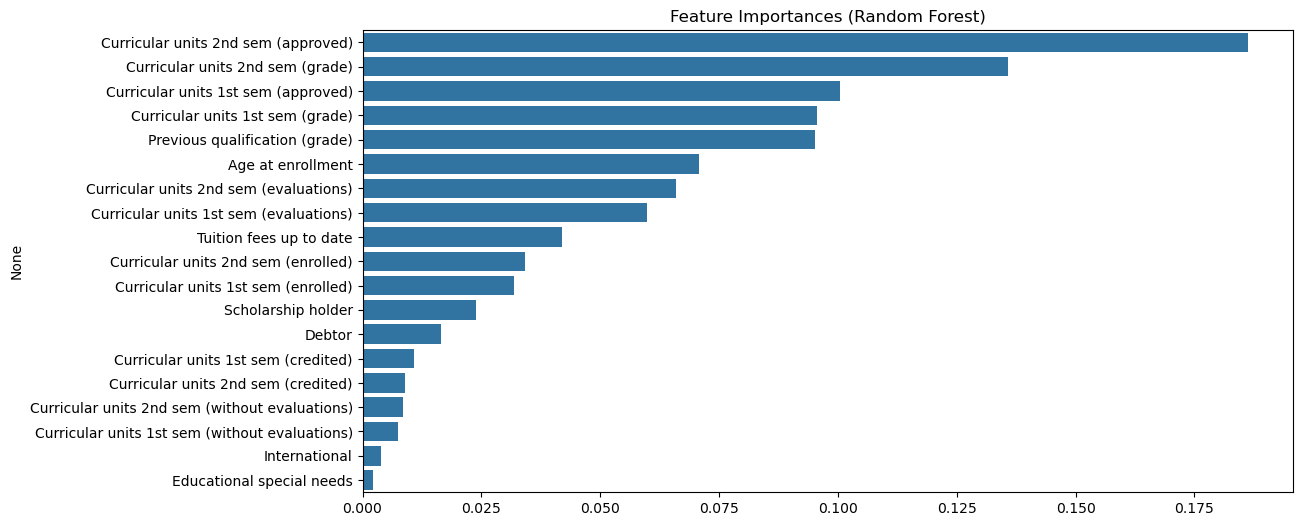

In [45]:
# Get feature importances from Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances (Random Forest)")
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.savefig('random_forest_feature_importances.png', bbox_inches='tight')
plt.show()

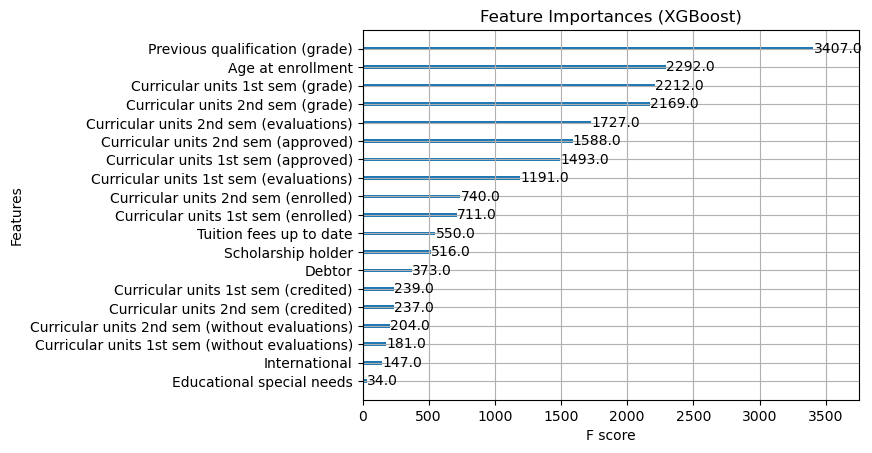

In [46]:
# Plot feature importances from XGBoost
xgb.plot_importance(xg)
plt.title("Feature Importances (XGBoost)")
plt.savefig('xgboost_feature_importances.png', bbox_inches='tight')
plt.show()

##### - SHAP values

<Figure size 1000x600 with 0 Axes>

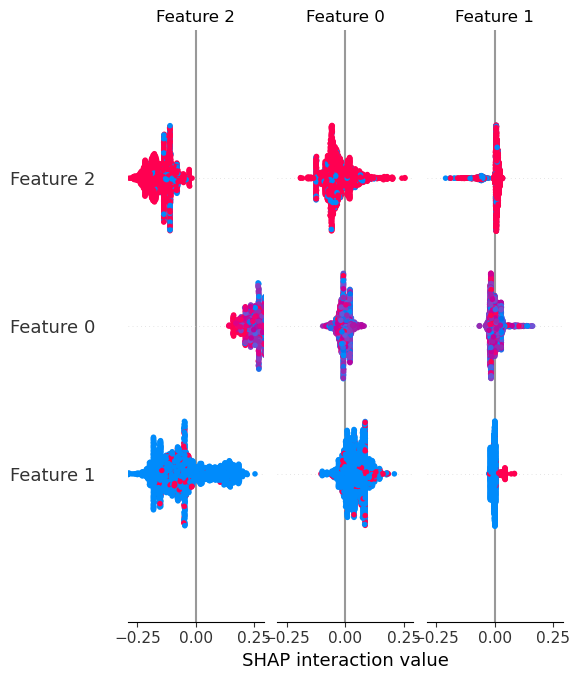

In [47]:
# Create the explainer for Random Forest
explainer = shap.TreeExplainer(rf)

# Calculate SHAP values
shap_values = explainer.shap_values(X_train)

# Create the summary plot without displaying it
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
shap.summary_plot(shap_values, X_train, show=False)  # Set show=False

# Save the summary plot
plt.savefig('shap_summary_random_forest.png', bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

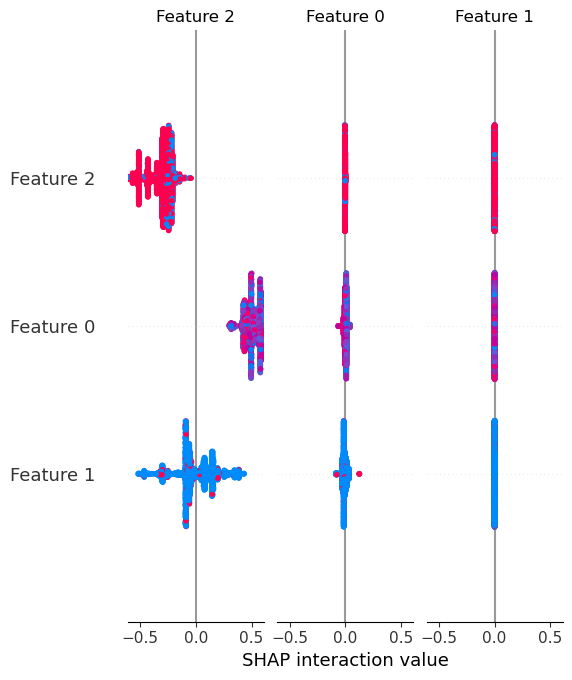

In [53]:
# Create the explainer for Decision Tree
explainer = shap.TreeExplainer(dt)

# Calculate SHAP values
shap_values = explainer.shap_values(X_train)

# Create the summary plot without displaying it
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
shap.summary_plot(shap_values, X_train, show=False)  # Set show=False

# Save the summary plot
plt.savefig('shap_summary_decision_tree.png', bbox_inches='tight')

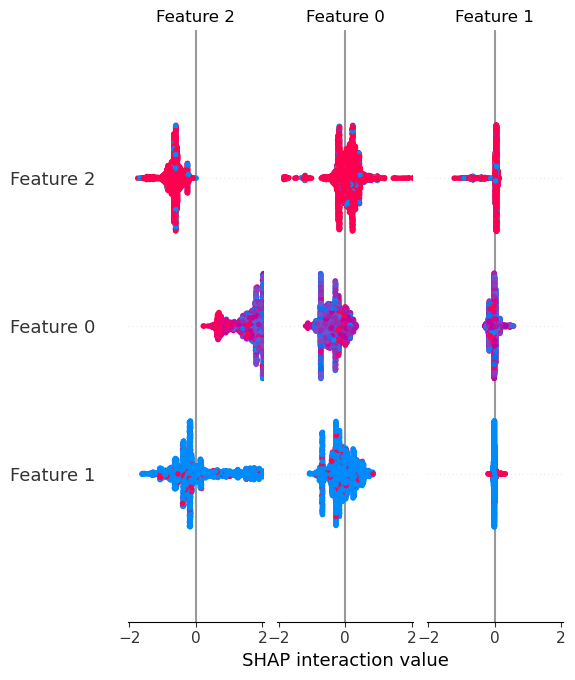

<Figure size 640x480 with 0 Axes>

In [51]:
# Create SHAP explainer for XGBoost
explainer_xgb = shap.Explainer(xg)
shap_values_xgb = explainer_xgb(X_train)

# Plot SHAP summary
shap.summary_plot(shap_values_xgb, X_train)
plt.savefig('shap_summary_random_forest.png', bbox_inches='tight')
plt.show()

##### - Partial dependence plots

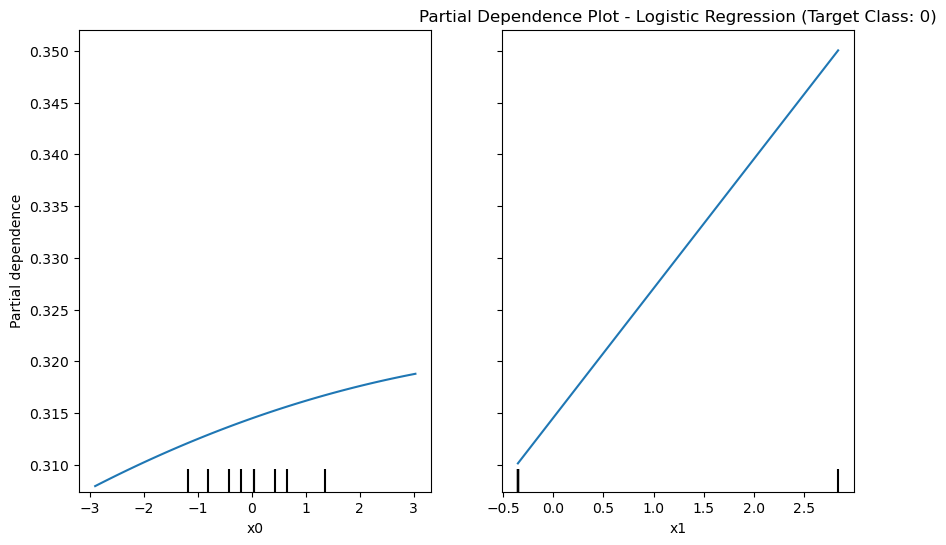

In [54]:
# Specify the target class for which you want to plot the partial dependence
target_class = 0

# Partial Dependence Plot for Logistic Regression
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    log_reg, 
    X_train, 
    features=[0, 1], 
    ax=ax, 
    target=target_class
)
plt.title(f"Partial Dependence Plot - Logistic Regression (Target Class: {target_class})")
plt.savefig("lr_plot.png")
plt.show()



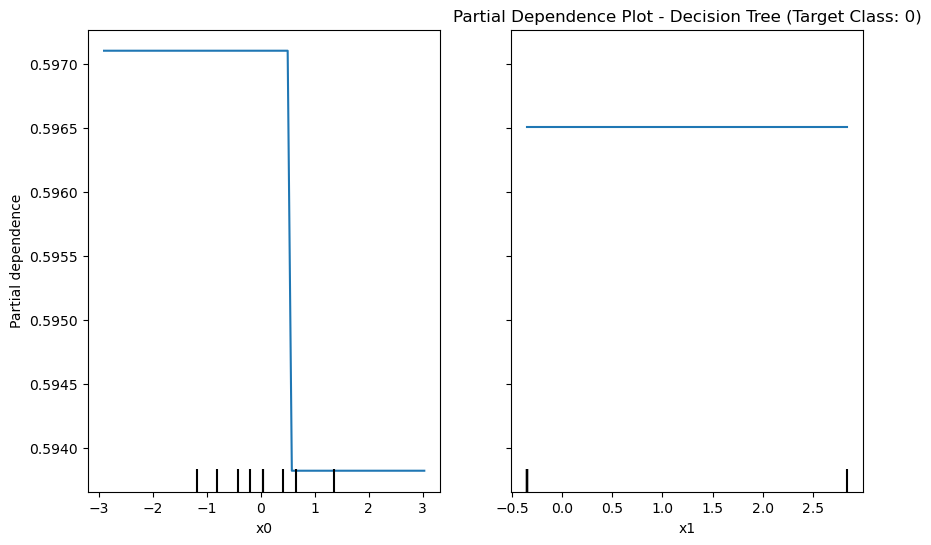

In [55]:
# Partial Dependence Plot for Decision Trees
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    dt, 
    X_train, 
    features=[0, 1], 
    ax=ax, 
    target=target_class
)
plt.title(f"Partial Dependence Plot - Decision Tree (Target Class: {target_class})")
plt.savefig("dt_plot.png")
plt.show()

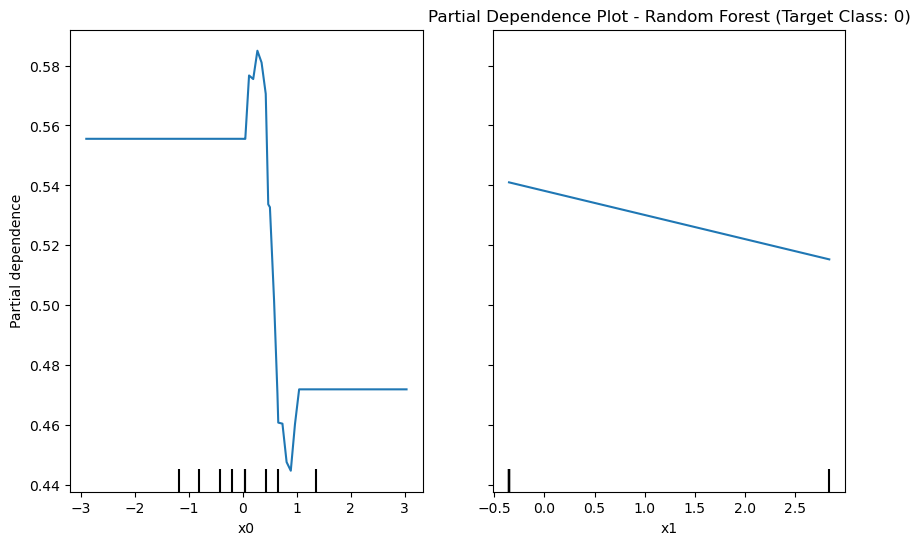

In [56]:
# Partial Dependence Plot for Random Forest
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    rf, 
    X_train, 
    features=[0, 1], 
    ax=ax, 
    target=target_class
)
plt.title(f"Partial Dependence Plot - Random Forest (Target Class: {target_class})")
plt.savefig("rf_plot.png")
plt.show()

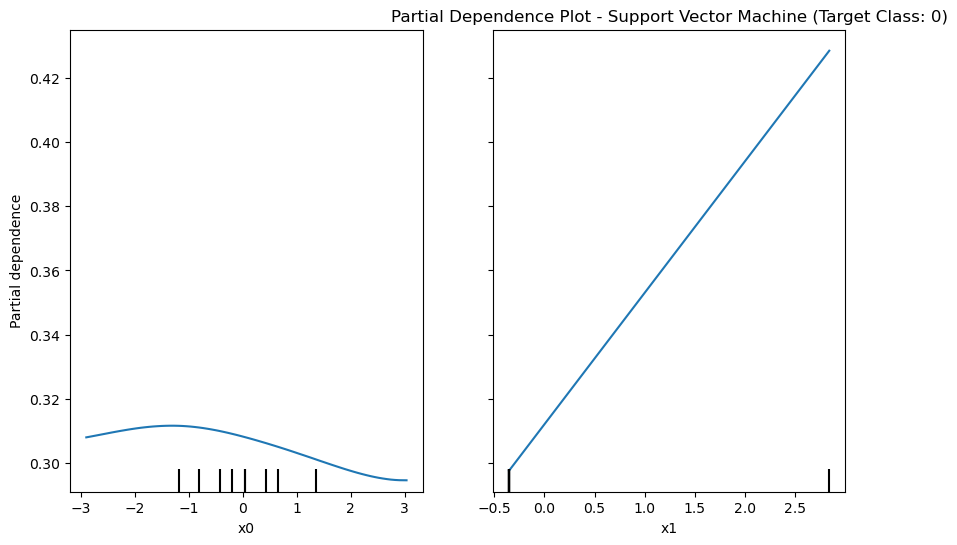

In [57]:
# Partial Dependence Plot for Support Vector Machine
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    svm, 
    X_train, 
    features=[0, 1], 
    ax=ax, 
    target=target_class
)
plt.title(f"Partial Dependence Plot - Support Vector Machine (Target Class: {target_class})")
plt.savefig("svm_plot.png")
plt.show()

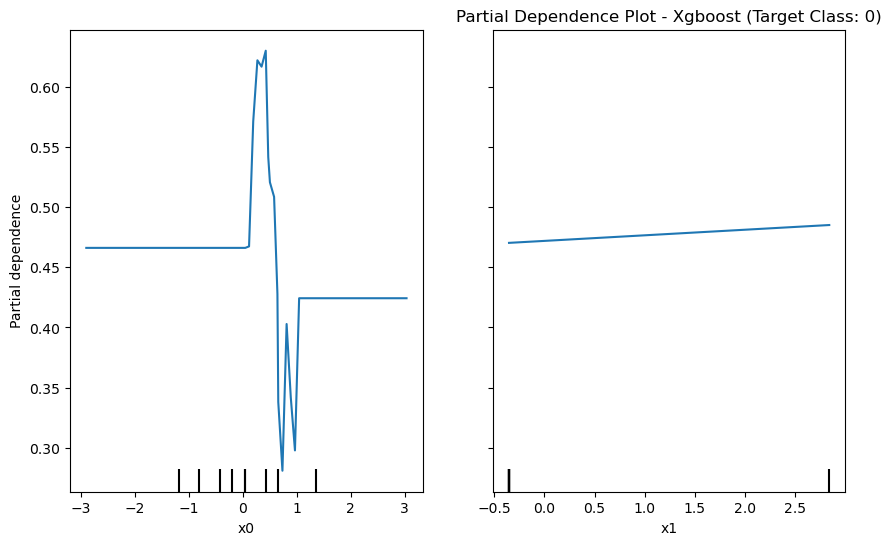

In [55]:
# Partial Dependence Plot for Xgboost
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    xg, 
    X_train, 
    features=[0, 1], 
    ax=ax, 
    target=target_class
)
plt.title(f"Partial Dependence Plot - Xgboost (Target Class: {target_class})")
plt.savefig("xgb_plot.png")
plt.show()

#### Model Fine-tuning and Final Selection

##### - Refine the best-performing models

In [32]:
# Define hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

# Get the best Random Forest model
best_rf_model = rf_grid_search.best_estimator_
print("Best Random Forest Hyperparameters:", rf_grid_search.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Random Forest Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [31]:
# Define hyperparameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9],
}

xgb_grid_search = GridSearchCV(estimator=xg, param_grid=xgb_param_grid, cv=3, n_jobs=-1, verbose=2)
xgb_grid_search.fit(X_train, y_train)

# Get the best XGBoost model
best_xgb_model = xgb_grid_search.best_estimator_
print("Best XGBoost Hyperparameters:", xgb_grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best XGBoost Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


##### - Final model evaluation on the test set

In [39]:
# Final evaluation on test set for Random Forest
best_rf_predictions = best_rf_model.predict(X_test)
print("Final Random Forest Classification Report:")
print(classification_report(y_test, best_rf_predictions))
print(f"Final Random Forest Accuracy: {accuracy_score(y_test, best_rf_predictions):.4f}")
print()

# Final evaluation on test set for XGBoost
best_xgb_predictions = best_xgb_model.predict(X_test)
print("Final XGBoost Classification Report:")
print(classification_report(y_test, best_xgb_predictions))
print(f"Final XGBoost Accuracy: {accuracy_score(y_test, best_xgb_predictions):.4f}")


Final Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       291
           1       0.54      0.36      0.43       160
           2       0.79      0.93      0.86       434

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.76      0.77      0.76       885

Final Random Forest Accuracy: 0.7706

Final XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       291
           1       0.49      0.35      0.41       160
           2       0.80      0.92      0.86       434

    accuracy                           0.76       885
   macro avg       0.70      0.67      0.68       885
weighted avg       0.75      0.76      0.75       885

Final XGBoost Accuracy: 0.7627


##### - Select the final model

In [41]:
rf_accuracy = accuracy_score(y_test, best_rf_predictions)
xgb_accuracy = accuracy_score(y_test, best_xgb_predictions)

# Compare accuracies and interpretability
if rf_accuracy > xgb_accuracy:
    final_model = best_rf_model
    print("Final Model Selected: Random Forest")
else:
    final_model = best_xgb_model
    print("Final Model Selected: XGBoost")

Final Model Selected: Random Forest


In [42]:
# save the final model
import joblib

joblib.dump(final_model, 'final_model.pkl')

['final_model.pkl']

In [49]:
optimised_models = {
    "Logistic Regression": grid_search.best_estimator_,
    "Decision Tree": grid_search_dt.best_estimator_,
    "Random Forest": rf_grid_search.best_estimator_,
    "Support Vector Machine": grid_search_svm.best_estimator_,
    "XGBoost": xgb_grid_search.best_estimator_
}

In [51]:
import pickle

In [52]:
# Save models using pickle
for model_name, model in optimised_models.items():
    with open(f'{model_name}.pkl', 'wb') as file:
        pickle.dump(model, file)

# Load models back into a new dictionary
loaded_models = {}
for model_name in optimised_models.keys():
    with open(f'{model_name}.pkl', 'rb') as file:
        loaded_models[model_name] = pickle.load(file)